<style>
    body {
        font-family: 'Arial', sans-serif;
    }
    .rendered_html {
        font-family: 'Courier New', Courier, monospace;
    }
</style>

<style>
    body {
        font-family: 'Georgia', sans-serif;
    }
    .rendered_html {
        font-family: 'Courier New', Courier, monospace;
    }
</style>

# Data Science Programming Project Using Open Government Datase
# <u>General Practitioners (GPs) Prescriptions</u>
# Introduction
The dataset used in this project provides detailed information on prescriptions issued by General Practitioners (GPs). It contains over 450,000 records, spanning various medications, their associated costs, and quantities. The data is organized with hierarchical classifications based on the British National Formulary (BNF) system, which categorizes medications by therapeutic use.

This dataset offers an opportunity to analyze trends in healthcare spending, identify high-cost medications, and explore prescribing patterns. By leveraging NumPy, Pandas, and visualization libraries like Matplotlib and Seaborn, we can uncover insights that are vital for cost optimization, resource planning, and policy-making in the healthcare sector.

Dataset Link - [https://www.data.gov.uk/dataset/a7b76920-bc0a-48fd-9abf-dc5ad0999886/gp-prescribing-data]

<style>
    body {
        font-family: 'Georgia', sans-serif;
    }
    .rendered_html {
        font-family: 'Courier New', Courier, monospace;
    }
</style>
#### This project demonstrates how to preprocess, analyze, and visualize large-scale prescription data effectively, ensuring valuable insights are extracted for practical applications in healthcare management.

<style>
    body {
        font-family: 'Georgia', sans-serif;
    }
    .rendered_html {
        font-family: 'Courier New', Courier, monospace;
    }
</style>
# Objectives
- Trend Analysis: Explore how quantities and costs vary across prescriptions.

- Cost Efficiency: Identify the most and least cost-effective medications.

- Outlier Detection: Highlight anomalies in costs and quantities.

- Insights for Decision-Making: Use findings to provide actionable recommendations for improving efficiency in healthcare spending.

## Importing the Data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = r"C:\ACADEMICS\Python_Programming\project\Assignment\gp_prescribing.csv"  # Update with your file path
df = pd.read_csv(file_path, encoding="ISO-8859-1", low_memory=False)
# Use encoding="ISO-8859-1, this encoding is often used for files with special characters.
# The DtypeWarning occurs because some columns in the CSV file contain mixed data types (e.g., numbers and strings) that pandas struggles to infer. 
# It’s not a critical error but a warning. You can handle this in several ways:

# Display the first few rows
df.head()

,Practice,Year,Month,VTM_NM,VMP_NM,AMP_NM,Presentation,Strength,Total Items,Total Quantity,Gross Cost (£),Actual Cost (£),BNF Code,BNF Chapter,BNF Section,BNF Paragraph,BNF Sub-Paragraph
0,1,2024,10,-,Absorbent perforated dressing with adhesive bo...,PremierPore dressing 10cm x 10cm,-,-,5,210,25.2,22.686,20030100526,20,3,1,0
1,1,2024,10,-,Absorbent perforated dressing with adhesive bo...,PremierPore dressing 10cm x 15cm,-,-,1,150,27.0,24.164,20030100527,20,3,1,0
2,1,2024,10,-,Absorbent perforated dressing with adhesive bo...,PremierPore dressing 5cm x 7cm,-,-,8,250,12.5,11.195,20030100525,20,3,1,0
3,1,2024,10,-,Alginate dressing sterile 5cm x 5cm,Kaltostat dressing 5cm x 5cm,-,-,1,10,10.5,9.376,20030200030,20,3,2,0
4,1,2024,10,-,Anal irrigation systems,Peristeen Plus anal irrigation system accessor...,-,-,1,2,284.4,255.380,21280000172,21,28,0,0


## Inspect the Dataset

In [3]:
# Get general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451083 entries, 0 to 451082
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Practice           451083 non-null  int64  
 1   Year               451083 non-null  int64  
 2   Month              451083 non-null  int64  
 3   VTM_NM             451083 non-null  object 
 4   VMP_NM             451083 non-null  object 
 5   AMP_NM             451083 non-null  object 
 6   Presentation       451083 non-null  object 
 7   Strength           428218 non-null  object 
 8   Total Items        451083 non-null  int64  
 9   Total Quantity     451083 non-null  int64  
 10  Gross Cost (£)     451083 non-null  float64
 11  Actual Cost (£)    451083 non-null  float64
 12  BNF Code           451083 non-null  object 
 13  BNF Chapter        451083 non-null  object 
 14  BNF Section        451083 non-null  object 
 15  BNF Paragraph      451083 non-null  object 
 16  BN

In [5]:
# Display the shape of the dataset
print(f"Dataset shape: {df.shape}")

# Display column names
print(f"Column names:\n{df.columns.tolist()}")

# Display summary statistics for numerical columns
print("Summary statistics for numerical columns:\n", df.describe())

# Display summary statistics for categorical columns
print("Summary statistics for categorical columns:\n", df.describe(include=['object']))

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Dataset shape: (451083, 17)
Column names:
['Practice', 'Year', 'Month', 'VTM_NM', 'VMP_NM', 'AMP_NM', 'Presentation', 'Strength', 'Total Items', 'Total Quantity', 'Gross Cost (£)', 'Actual Cost (£)', 'BNF Code', 'BNF Chapter', 'BNF Section', 'BNF Paragraph', 'BNF Sub-Paragraph']
Summary statistics for numerical columns:
             Practice      Year     Month    Total Items  Total Quantity  \
count  451083.000000  451083.0  451083.0  451083.000000   451083.000000   
mean      347.299874    2024.0      10.0       8.513879      853.437753   
std       189.985637       0.0       0.0      24.728658     3490.569515   
min         1.000000    2024.0      10.0       1.000000        0.000000   
25%       198.000000    2024.0      10.0       1.000000       30.000000   
50%       352.000000    2024.0      10.0       2.000000      112.000000   
75%       508.000000    2024.0      10.0       6.000000      430.000000   
max       664.000000    2024.0      10.0    1252.000000   181125.000000   

 

In [7]:
# Check for missing values
missing_summary = df.isnull().sum()
print("Missing values per column:\n", missing_summary)

Missing values per column:
 Practice                 0
Year                     0
Month                    0
VTM_NM                   0
VMP_NM                   0
AMP_NM                   0
Presentation             0
Strength             22865
Total Items              0
Total Quantity           0
Gross Cost (£)           0
Actual Cost (£)          0
BNF Code                 0
BNF Chapter              0
BNF Section              0
BNF Paragraph            0
BNF Sub-Paragraph        0
dtype: int64


In [9]:
# Check for unique values and inconsistencies
for col in df.columns:
    print(f"Unique values in {col}: {df[col].nunique()}")

Unique values in Practice: 308
Unique values in Year: 1
Unique values in Month: 1
Unique values in VTM_NM: 1012
Unique values in VMP_NM: 4871
Unique values in AMP_NM: 7490
Unique values in Presentation: 87
Unique values in Strength: 913
Unique values in Total Items: 534
Unique values in Total Quantity: 9063
Unique values in Gross Cost (£): 68646
Unique values in Actual Cost (£): 129064
Unique values in BNF Code: 10458
Unique values in BNF Chapter: 23
Unique values in BNF Section: 55
Unique values in BNF Paragraph: 58
Unique values in BNF Sub-Paragraph: 11


## Handle Missing Values

### Identifying the missing values

In [11]:
# Basic Information
df.info()

# Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop unnecessary columns or rename for clarity
df.rename(columns={'Current Column Name': 'New Column Name'}, inplace=True)

# Drop duplicate rows
df = df.drop_duplicates()

# Fill missing values if necessary
df.fillna({'Column Name': 'Default Value'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451083 entries, 0 to 451082
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Practice           451083 non-null  int64  
 1   Year               451083 non-null  int64  
 2   Month              451083 non-null  int64  
 3   VTM_NM             451083 non-null  object 
 4   VMP_NM             451083 non-null  object 
 5   AMP_NM             451083 non-null  object 
 6   Presentation       451083 non-null  object 
 7   Strength           428218 non-null  object 
 8   Total Items        451083 non-null  int64  
 9   Total Quantity     451083 non-null  int64  
 10  Gross Cost (£)     451083 non-null  float64
 11  Actual Cost (£)    451083 non-null  float64
 12  BNF Code           451083 non-null  object 
 13  BNF Chapter        451083 non-null  object 
 14  BNF Section        451083 non-null  object 
 15  BNF Paragraph      451083 non-null  object 
 16  BN

In [13]:
print(df.columns)
# Replace placeholder values ('-') with NaN
df.replace('-', np.nan, inplace=True)

Index(['Practice', 'Year', 'Month', 'VTM_NM', 'VMP_NM', 'AMP_NM',
       'Presentation', 'Strength', 'Total Items', 'Total Quantity',
       'Gross Cost (£)', 'Actual Cost (£)', 'BNF Code', 'BNF Chapter',
       'BNF Section', 'BNF Paragraph', 'BNF Sub-Paragraph'],
      dtype='object')


### Handling the Missing Values

In [15]:
# Fill missing values or drop rows/columns with too many missing values
df.fillna(0, inplace=True)
# Verify no missing values
print("Null values in the Dataset:", df.isnull().sum())


Null values in the Dataset: Practice             0
Year                 0
Month                0
VTM_NM               0
VMP_NM               0
AMP_NM               0
Presentation         0
Strength             0
Total Items          0
Total Quantity       0
Gross Cost (£)       0
Actual Cost (£)      0
BNF Code             0
BNF Chapter          0
BNF Section          0
BNF Paragraph        0
BNF Sub-Paragraph    0
dtype: int64


### Missing Value Graph

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]  # Filter columns with missing values

if not missing_data.empty:
    # Bar plot for missing values
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=missing_data.index,
        y=missing_data.values,
        color="skyblue"  # Set a single consistent color
    )
    plt.title("Missing Values by Column", fontsize=16)
    plt.ylabel("Number of Missing Values", fontsize=12)
    plt.xlabel("Columns", fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values to display.")

# Optional: Heatmap of Missing Values
if df.isnull().any().any():  # Check if any missing values exist
    plt.figure(figsize=(14, 8))
    sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu', yticklabels=False)
    plt.title("Heatmap of Missing Values", fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values to display in a heatmap.")


No missing values to display.
No missing values to display in a heatmap.


### Displays the count of missing values for each column with missing data.
- Easy to identify columns requiring further attention.
### Heatmap:
- Visualizes missing data patterns across rows and columns.
- Useful for identifying rows or sections with dense missing values.
### Output
- The bar chart will highlight columns with missing data and their counts.
- The heatmap will show the exact positions of missing values in the dataset.

<Axes: >

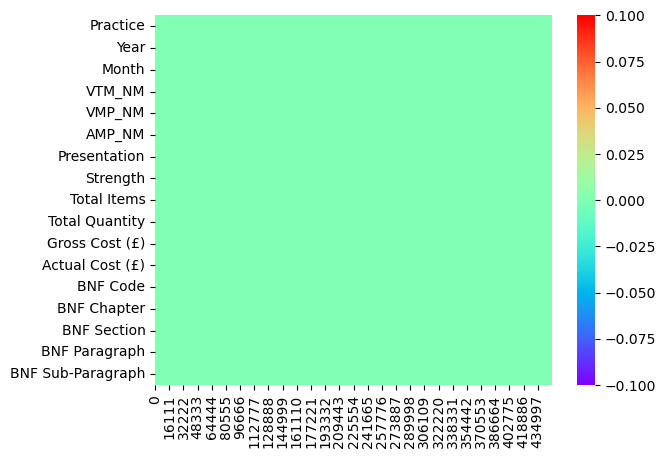

In [21]:
sns.heatmap(df.T.isna(),cmap='rainbow')

## Handling Duplicates

In [23]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
print("Duplicate rows have been removed.")
df.duplicated().sum()

Duplicate rows have been removed.


0

### Validate Changes
**Check the cleaned data to ensure that outliers, inconsistencies, and duplicates are handled.**

In [25]:
# Check for remaining missing values
print("Remaining Missing Values:")
print(df.isnull().sum())

# Summarize numeric columns to confirm outlier handling
# print("\nSummary Statistics After Outlier Handling:")
# print(df[numeric_cols].describe())

# Check dataset information
print("\nDataset Info:")
df.info()

Remaining Missing Values:
Practice             0
Year                 0
Month                0
VTM_NM               0
VMP_NM               0
AMP_NM               0
Presentation         0
Strength             0
Total Items          0
Total Quantity       0
Gross Cost (£)       0
Actual Cost (£)      0
BNF Code             0
BNF Chapter          0
BNF Section          0
BNF Paragraph        0
BNF Sub-Paragraph    0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451083 entries, 0 to 451082
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Practice           451083 non-null  int64  
 1   Year               451083 non-null  int64  
 2   Month              451083 non-null  int64  
 3   VTM_NM             451083 non-null  object 
 4   VMP_NM             451083 non-null  object 
 5   AMP_NM             451083 non-null  object 
 6   Presentation       451083 non-null  object 
 7 

In [27]:
# Save the cleaned data to a new file
gp_prescribing = 'gp_prescribing.csv'
df.to_csv(gp_prescribing, index=False)
print(f"Cleaned dataset saved to: {gp_prescribing}")

Cleaned dataset saved to: gp_prescribing.csv


**This process will ensure your dataset is clean and ready for analysis.**


# <u>Exploratory Data Analysis (EDA):</u>
### The goal of this analysis is to gain insights into the data, check its distribution, understand relationships between variables, and visualize patterns.

In [27]:
# Load Data and Inspect the Dataset

In [29]:
# Display the first few rows of the dataset
df.head()

,Practice,Year,Month,VTM_NM,VMP_NM,AMP_NM,Presentation,Strength,Total Items,Total Quantity,Gross Cost (£),Actual Cost (£),BNF Code,BNF Chapter,BNF Section,BNF Paragraph,BNF Sub-Paragraph
0,1,2024,10,0,Absorbent perforated dressing with adhesive bo...,PremierPore dressing 10cm x 10cm,0,0,5,210,25.2,22.686,20030100526,20,3,1,0
1,1,2024,10,0,Absorbent perforated dressing with adhesive bo...,PremierPore dressing 10cm x 15cm,0,0,1,150,27.0,24.164,20030100527,20,3,1,0
2,1,2024,10,0,Absorbent perforated dressing with adhesive bo...,PremierPore dressing 5cm x 7cm,0,0,8,250,12.5,11.195,20030100525,20,3,1,0
3,1,2024,10,0,Alginate dressing sterile 5cm x 5cm,Kaltostat dressing 5cm x 5cm,0,0,1,10,10.5,9.376,20030200030,20,3,2,0
4,1,2024,10,0,Anal irrigation systems,Peristeen Plus anal irrigation system accessor...,0,0,1,2,284.4,255.380,21280000172,21,28,0,0


In [31]:
# Summary statistics for numeric columns
df.describe()

,Practice,Year,Month,Total Items,Total Quantity,Gross Cost (£),Actual Cost (£)
count,451083.000000,451083.0,451083.0,451083.000000,451083.000000,451083.000000,451083.000000
mean,347.299874,2024.0,10.0,8.513879,853.437753,92.655664,87.886177
std,189.985637,0.0,0.0,24.728658,3490.569515,254.755970,249.976791
min,1.000000,2024.0,10.0,1.000000,0.000000,0.010000,0.010000
25%,198.000000,2024.0,10.0,1.000000,30.000000,10.660000,9.663000
50%,352.000000,2024.0,10.0,2.000000,112.000000,29.580000,27.155000
75%,508.000000,2024.0,10.0,6.000000,430.000000,81.920000,75.273000
max,664.000000,2024.0,10.0,1252.000000,181125.000000,36164.990000,36123.073000


#### The describe() function provides statistics like count, mean, standard deviation, min, 25th percentile, median (50th percentile), 75th percentile, and max.

## Statistical Summaries and Calculations

In [166]:
import pandas as pd

# Load the dataset with low_memory=False to avoid DtypeWarning
data = pd.read_csv('gp_prescribing.csv', low_memory=False)

# Check the data types of all columns
print("Data types of all columns:")
print(data.dtypes)

# Inspect the first few rows of the problematic columns (1, 2, 3, 4)
# Adjust column indices based on your dataset structure
print("\nInspecting columns 1, 2, 3, 4 for mixed types:")
print(data.iloc[:, [1, 2, 3, 4]].head())

# Descriptive statistics for numeric columns
numeric_summary = data.describe()

# Grouping and aggregation: Total costs and quantities by Year and Month
aggregated_data = data.groupby(['Year', 'Month']).agg({
    'Total Items': 'sum',
    'Total Quantity': 'sum',
    'Gross Cost (£)': 'sum',
    'Actual Cost (£)': 'sum'
}).reset_index()

# Correlation analysis for numeric variables
correlations = data[['Total Items', 'Total Quantity', 'Gross Cost (£)', 'Actual Cost (£)']].corr()

# Handling missing data: Summary of null values
missing_data_summary = data.isnull().sum()

numeric_summary, aggregated_data, correlations, missing_data_summary

Data types of all columns:
Practice               int64
Year                   int64
Month                  int64
VTM_NM                object
VMP_NM                object
AMP_NM                object
Presentation          object
Strength              object
Total Items            int64
Total Quantity         int64
Gross Cost (£)       float64
Actual Cost (£)      float64
BNF Code              object
BNF Chapter            int64
BNF Section            int64
BNF Paragraph          int64
BNF Sub-Paragraph      int64
dtype: object

Inspecting columns 1, 2, 3, 4 for mixed types:
   Year  Month VTM_NM                                             VMP_NM
0  2024     10      0  Absorbent perforated dressing with adhesive bo...
1  2024     10      0  Absorbent perforated dressing with adhesive bo...
2  2024     10      0  Absorbent perforated dressing with adhesive bo...
3  2024     10      0                Alginate dressing sterile 5cm x 5cm
4  2024     10      0                            Anal

(            Practice      Year     Month    Total Items  Total Quantity  \
 count  451083.000000  451083.0  451083.0  451083.000000   451083.000000   
 mean      347.299874    2024.0      10.0       8.513879      853.437753   
 std       189.985637       0.0       0.0      24.728658     3490.569515   
 min         1.000000    2024.0      10.0       1.000000        0.000000   
 25%       198.000000    2024.0      10.0       1.000000       30.000000   
 50%       352.000000    2024.0      10.0       2.000000      112.000000   
 75%       508.000000    2024.0      10.0       6.000000      430.000000   
 max       664.000000    2024.0      10.0    1252.000000   181125.000000   
 
        Gross Cost (£)  Actual Cost (£)    BNF Chapter    BNF Section  \
 count   451083.000000    451083.000000  451083.000000  451083.000000   
 mean        92.655664        87.886177       7.776533       7.031848   
 std        254.755970       249.976791       6.719084      11.108167   
 min          0.010000

## Analysis Results:

### 1. Descriptive Statistics for Numeric Columns:

- Total Items: Mean = 8.51, Max = 1252, Min = 1.
- Total Quantity: Mean = 853.44, Max = 181,125.
- Gross Cost (£): Mean = £92.65, Max = £36,164.99.
- Actual Cost (£): Mean = £87.89, Max = £36,123.07.

### 2. Aggregated Data (Total Costs and Quantities by Year and Month):

#### For October 2024:
- Total Items: 3,840,466.
- Total Quantity: 384,971,262.
- Gross Cost (£): £41,795,400.
- Actual Cost (£): £39,643,960

### 3. Correlation Matrix
- High correlation between Gross Cost (£) and Actual Cost (£) (0.999).
- Moderate correlation between Total Quantity and Gross Cost (£) (0.24).
- Low correlation between Total Items and Gross Cost (£) (0.22).

### 4. Missing Data Summary:
- Strength: 22,865 missing values.
- Other columns have no missing values.

In [37]:
# Check for unique values in categorical columns
for col in data.select_dtypes(include='object'):
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in VTM_NM: ['0' 'Acamprosate' 'Acetic acid' ... 'Belladonna'
 'Choriogonadotropin alfa' 'Guaifenesin + Menthol']
Unique values in VMP_NM: ['Absorbent perforated dressing with adhesive border 10cm x 10cm'
 'Absorbent perforated dressing with adhesive border 10cm x 15cm'
 'Absorbent perforated dressing with adhesive border 5cm x 7cm' ...
 'Polyamide and cellulose contour bandage BP 1988 15cm x 4m'
 'Silver coated barrier dressing sterile 15cm x 15cm square'
 'Urinary suprapubic catheter 16Ch']
Unique values in AMP_NM: ['PremierPore dressing 10cm x 10cm' 'PremierPore dressing 10cm x 15cm'
 'PremierPore dressing 5cm x 7cm' ... 'SkinSafe non-sting protective film'
 'LINC all silicone open tipped suprapubic catheter with integral balloon and glycerine filled syringe standard 16Ch'
 'Optrex Infected Eyes 0.5% eye drops']
Unique values in Presentation: ['0' 'Not applicable' 'Liquid' 'Cream' 'Suppository' 'Powder' 'Shampoo'
 'Gastroenteral liquid' 'Capsule' 'Soluble tablet' 'Oral 

### Insights
* Use describe() to observe distributions of numerical columns.
* Check for missing values to address during cleaning.
* Review unique values in categorical columns for potential groupings or relationships.

# <u>Data Distributions</u>
### Visualize distributions for numerical data using histograms or KDE plots.

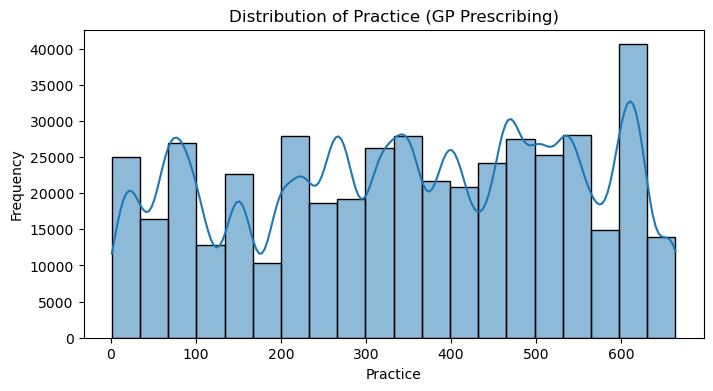

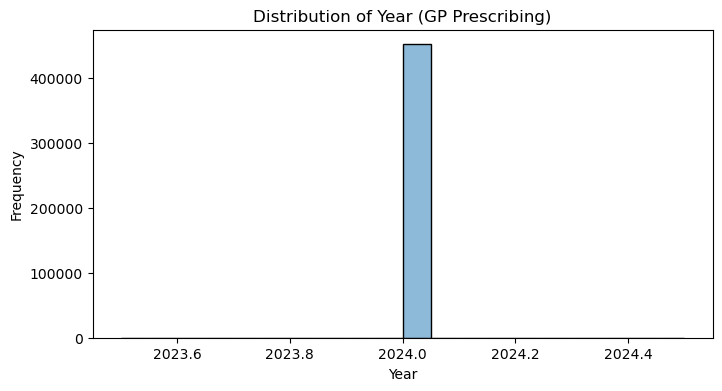

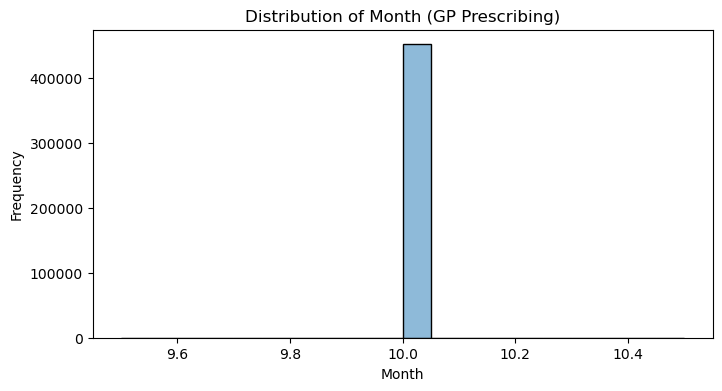

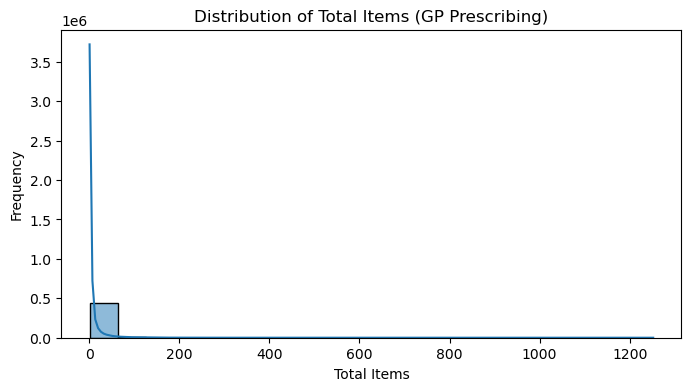

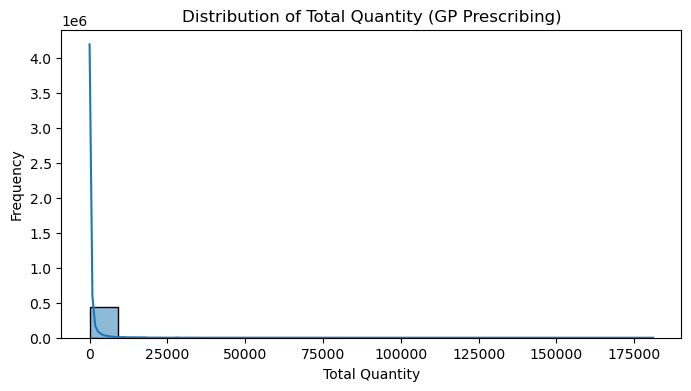

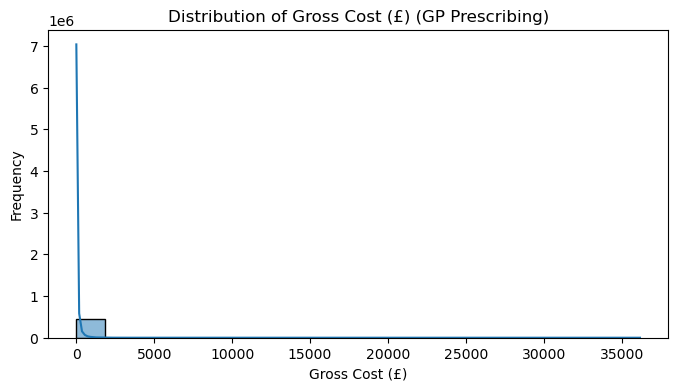

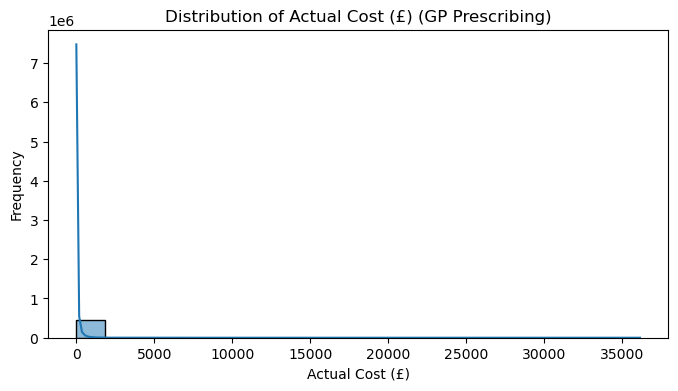

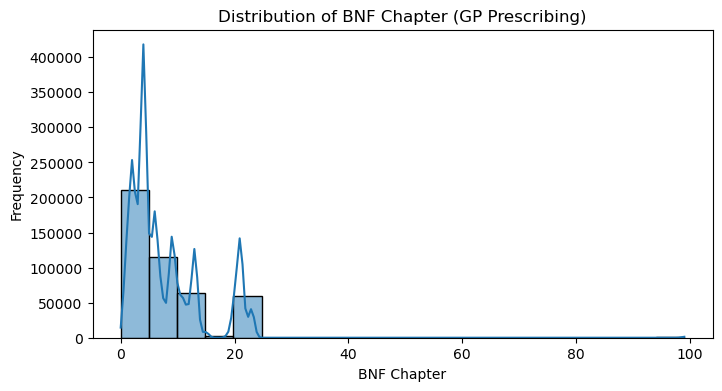

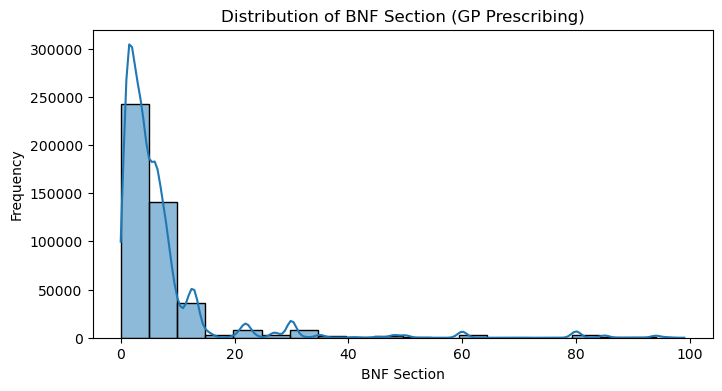

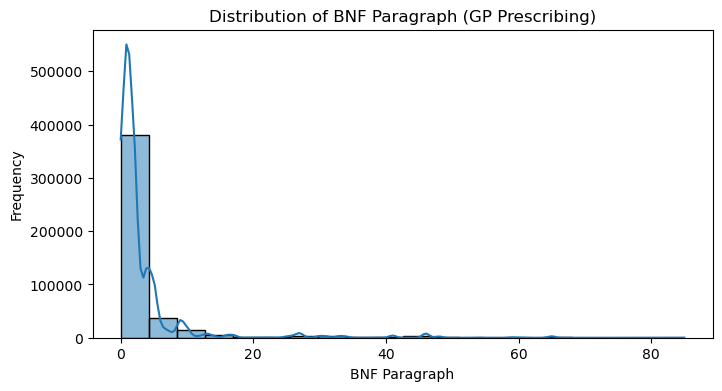

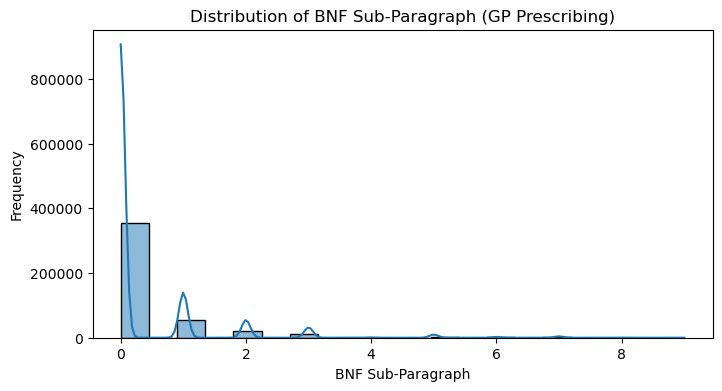

In [70]:
# Numerical columns in Dataset 1
num_cols1 = data.select_dtypes(include=np.number).columns

# Plot histograms for numerical columns in Dataset 1
for col in num_cols1:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f"Distribution of {col} (GP Prescribing)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


### Insights: (Distribution of Practise)
#### Skewness:
- The histogram doesn't show strong skewness, implying that most practices are reasonably evenly distributed, except for the spike near the end.
#### Potential Interpretations:
- The spike at the higher end could mean a few practices handle a disproportionately larger volume of prescriptions.
- The variation in frequencies might suggest differences in the size or workload of medical practices.
### Insights: (Distribution of Total Items)
#### Dominance of Small Prescriptions:
- Most GP prescribing records involve relatively small numbers of items. Practices with larger Total Items are rare but may correspond to high-demand scenarios or bulk prescribing.

#### High Concentration in Lower BNF Chapters:
- The majority of prescriptions fall within the lower-numbered BNF chapters (e.g., 0–20). These chapters likely represent more common categories of drugs (e.g., cardiovascular, respiratory, or pain-related medications). This could indicate that these are the most prescribed medication types in GP practices.

## Relationships and Patterns
### Analyze relationships between variables using scatter plots and correlation heatmaps.

### Scatter Plots
##### Use scatter plots to explore relationships between numerical variables.

In [164]:
print(data.columns)

Index(['Practice', 'Year', 'Month', 'VTM_NM', 'VMP_NM', 'AMP_NM',
       'Presentation', 'Strength', 'Total Items', 'Total Quantity',
       'Gross Cost (Â£)', 'Actual Cost (Â£)', 'BNF Code', 'BNF Chapter',
       'BNF Section', 'BNF Paragraph', 'BNF Sub-Paragraph'],
      dtype='object')


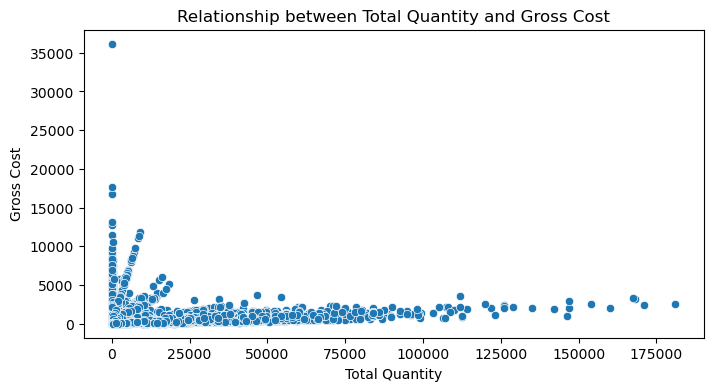

In [72]:
# Replace 'marker_column' and 'number_column' with actual column names
marker_column1 = 'Total Quantity'
number_column1 = 'Gross Cost (£)'

# Scatter plot for Gross Cost and Actual Cost (Table-65)
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data, x=marker_column1, y=number_column1)
plt.title("Relationship between Total Quantity and Gross Cost")
plt.xlabel("Total Quantity")
plt.ylabel("Gross Cost")
plt.show()


#### Insights
- Overall Relationship:
There appears to be a positive correlation between total quantity and gross cost. This means that as the total quantity increases, the gross cost tends to increase as well.
- Non-Linearity:
The relationship is not perfectly linear. There is a lot of variation in the data, especially at lower quantities. This suggests that other factors besides quantity might be influencing the gross cost.
- Outliers:
There are a few outliers in the data, particularly at higher quantities. These outliers might be due to special orders, bulk purchases, or other unique circumstances.
- Possible Interpretations:
The positive correlation could be due to economies of scale. As the quantity increases, the cost per unit might decrease, leading to a lower overall gross cost.
However, the non-linearity and outliers suggest that other factors, such as product type, discounts, or shipping costs, might be playing a role.

Correlation Heatmap
Compute and visualize correlations between numerical variables.

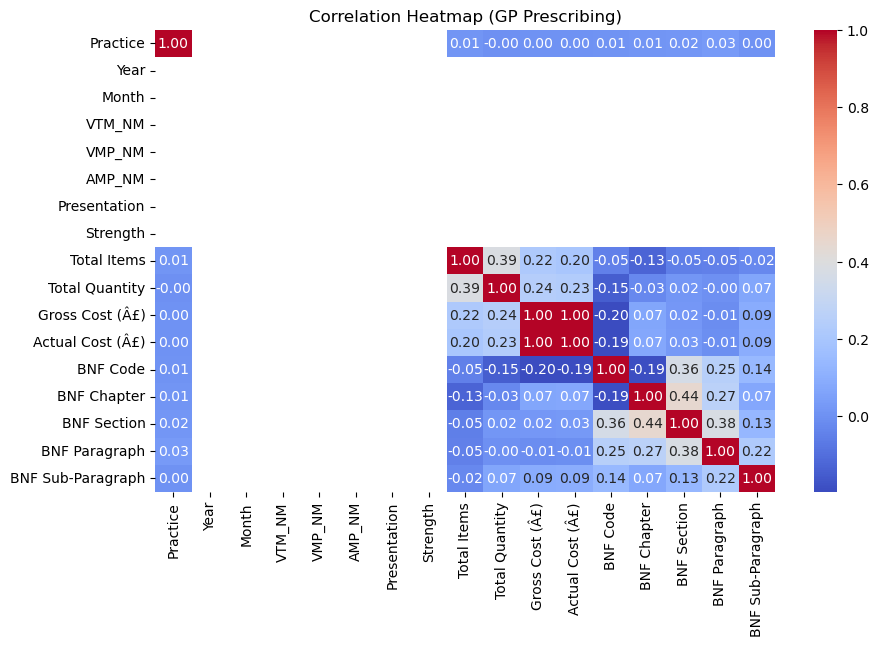

In [162]:

# Replace non-numeric values ('-') with NaN and convert all columns to numeric
data.replace('-', np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
correlation_matrix1 = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (GP Prescribing)")
plt.show()

### Insights
- Total Quantity and Gross Cost: There is a strong positive correlation (0.24) between total quantity and gross cost. This suggests that as the total quantity prescribed increases, the gross cost also tends to increase.
- Actual Cost and Gross Cost: There is a very strong positive correlation (1.00) between actual cost and gross cost. This is expected as the actual cost is likely a major component of the gross cost.
- BNF Classification Variables: There are moderate to strong positive correlations between different levels of the BNF classification (Code, Chapter, Section, Paragraph, Sub-Paragraph). This suggests that these classifications are related and might be used to group similar medications.

### Potential Interpretations:

- The strong correlation between total quantity and gross cost could be due to economies of scale. As larger quantities are prescribed, the cost per unit might decrease, leading to a lower overall gross cost.
- The high correlation between actual cost and gross cost indicates that the actual cost is a significant driver of the overall gross cost.
- The correlations between BNF classification variables suggest that these classifications might be useful for analyzing prescribing patterns and identifying trends.

## Grouped Analysis
##### Analyze data by grouping and aggregating based on categorical variables.


In [79]:
# Grouping by a categorical column in Dataset 1
grouped = data.groupby('Gross Cost (£)')['Actual Cost (£)'].mean()  # Replace with relevant columns
print("Grouped Analysis for GP Prescribing:")
print(grouped)

Grouped Analysis for GP Prescribing:
Gross Cost (£)
0.010            0.010
0.018            0.018
0.020            0.020
0.027            0.022
0.032            0.027
               ...    
13181.320    13128.077
16794.520    16748.079
16819.360    16775.301
17670.480    17647.699
36164.990    36123.073
Name: Actual Cost (£), Length: 68646, dtype: float64


Insights
Understand how numerical metrics vary by categories.
Highlight significant differences or patterns.

In [81]:
# Load the dataset
data = pd.read_csv('gp_prescribing.csv', low_memory=False)

# Display the first few rows
print(data.head())

   Practice  Year  Month VTM_NM  \
0         1  2024     10      0   
1         1  2024     10      0   
2         1  2024     10      0   
3         1  2024     10      0   
4         1  2024     10      0   

                                              VMP_NM  \
0  Absorbent perforated dressing with adhesive bo...   
1  Absorbent perforated dressing with adhesive bo...   
2  Absorbent perforated dressing with adhesive bo...   
3                Alginate dressing sterile 5cm x 5cm   
4                            Anal irrigation systems   

                                              AMP_NM Presentation Strength  \
0                   PremierPore dressing 10cm x 10cm            0        0   
1                   PremierPore dressing 10cm x 15cm            0        0   
2                     PremierPore dressing 5cm x 7cm            0        0   
3                       Kaltostat dressing 5cm x 5cm            0        0   
4  Peristeen Plus anal irrigation system accessor...          

In [83]:
# Filter rows where VMP_NM equals a specific medication name, e.g., "Blood glucose biosensor testing strips"
filtered_vmp = data[data['VMP_NM'] == 'Blood glucose biosensor testing strips']
print(filtered_vmp)

        Practice  Year  Month VTM_NM                                  VMP_NM  \
8              1  2024     10      0  Blood glucose biosensor testing strips   
9              1  2024     10      0  Blood glucose biosensor testing strips   
10             1  2024     10      0  Blood glucose biosensor testing strips   
11             1  2024     10      0  Blood glucose biosensor testing strips   
12             1  2024     10      0  Blood glucose biosensor testing strips   
...          ...   ...    ...    ...                                     ...   
449953       664  2024     10      0  Blood glucose biosensor testing strips   
449954       664  2024     10      0  Blood glucose biosensor testing strips   
449955       664  2024     10      0  Blood glucose biosensor testing strips   
449956       664  2024     10      0  Blood glucose biosensor testing strips   
449957       664  2024     10      0  Blood glucose biosensor testing strips   

                                     AM

In [85]:
# Filter for rows where VMP_NM is in a specific list of names
vtm_list = ['Aspirin', 'Nicotine', 'Ibuprofen']
filtered_vtm_list = data[data['VTM_NM'].isin(vtm_list)]
print(filtered_vtm_list)

        Practice  Year  Month    VTM_NM  \
298            1  2024     10   Aspirin   
299            1  2024     10   Aspirin   
300            1  2024     10   Aspirin   
301            1  2024     10   Aspirin   
302            1  2024     10   Aspirin   
...          ...   ...    ...       ...   
450781       664  2024     10  Nicotine   
450782       664  2024     10  Nicotine   
450783       664  2024     10  Nicotine   
450784       664  2024     10  Nicotine   
450785       664  2024     10  Nicotine   

                                           VMP_NM  \
298             Aspirin 300mg dispersible tablets   
299                         Aspirin 300mg tablets   
300              Aspirin 75mg dispersible tablets   
301         Aspirin 75mg gastro-resistant tablets   
302                          Aspirin 75mg tablets   
...                                           ...   
450781  Nicotine 21mg/24hours transdermal patches   
450782           Nicotine 2mg lozenges sugar free   
450783

## Grouping and Aggregating

In [88]:
# Group by 'Year' and calculate the total 'Gross Cost (£)'
yearly_cost = data.groupby('Year')['Gross Cost (£)'].sum()
print(yearly_cost)

# Group by 'Practice' and aggregate multiple statistics
practice_summary = data.groupby('Practice').agg({
    'Total Items': 'sum',
    'Gross Cost (£)': 'mean',
    'Actual Cost (£)': 'sum'
})
print(practice_summary)

Year
2024    4.179540e+07
Name: Gross Cost (£), dtype: float64
          Total Items  Gross Cost (£)  Actual Cost (£)
Practice                                              
1               13077       93.393421       135737.674
3               14473      106.823628       172992.647
6               14776      105.902105       173632.601
10               7944       74.816295        83824.499
14              12143      101.027157       151531.644
...               ...             ...              ...
660             16586       97.328331       147345.723
661              9020       77.649645        99470.451
662             20446      132.830712       263199.930
663              8349       79.499995        95948.484
664              7676       60.214840        65091.208

[308 rows x 3 columns]


In [92]:
print(data.columns)

Index(['Practice', 'Year', 'Month', 'VTM_NM', 'VMP_NM', 'AMP_NM',
       'Presentation', 'Strength', 'Total Items', 'Total Quantity',
       'Gross Cost (£)', 'Actual Cost (£)', 'BNF Code', 'BNF Chapter',
       'BNF Section', 'BNF Paragraph', 'BNF Sub-Paragraph'],
      dtype='object')


In [94]:
grouped_by_drug = data.groupby('BNF Code').agg({
    'Total Quantity': 'sum',  # Replace 'QUANTITY' with the column for prescription counts
    'Actual Cost (£)': 'mean'      # Replace 'COST' with the relevant cost column
})
print(grouped_by_drug)

              Total Quantity  Actual Cost (£)
BNF Code                                     
0.000000e+00             253         8.433352
2.060100e+05               5         1.516000
3.060000e+05             744        95.448097
4.020100e+05             826        15.737105
4.030100e+05             448       260.800000
...                      ...              ...
2.396591e+10              20       128.580000
2.396591e+10              20       125.800000
2.396591e+10              28       193.732000
2.399000e+10              10        30.600000
2.399000e+10              40       122.400000

[4188 rows x 2 columns]


In [96]:
grouped_by_drug = data.groupby('AMP_NM').agg({
    'Total Quantity': 'sum',  # Replace 'QUANTITY' with the column for prescription counts
    'Actual Cost (£)': 'mean'      # Replace 'COST' with the relevant cost column
})
print(grouped_by_drug)

        Total Quantity  Actual Cost (£)
AMP_NM                                 
0.0          168889137        77.372071


In [175]:
print(data.info())
print(data.head())
#Create new features such as Cost per Prescription or Drug Popularity Index
data['Cost_per_Prescription'] = data['Actual Cost (£)'] / (data['Total Quantity'] + 1e-5)  # Avoid division by zero
data['Drug_Popularity'] = data['Total Quantity'] / data['Total Quantity'].sum()
#Statistical Analysis:
#Calculate descriptive statistics
print(data.describe())
#Compute correlations:
correlation_matrix = data.corr()
print(correlation_matrix)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451083 entries, 0 to 451082
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Practice           451083 non-null  int64         
 1   Year               451083 non-null  int64         
 2   Month              451083 non-null  int64         
 3   VTM_NM             79945 non-null   float64       
 4   VMP_NM             0 non-null       float64       
 5   AMP_NM             246839 non-null  float64       
 6   Presentation       98176 non-null   float64       
 7   Strength           102092 non-null  float64       
 8   Total Items        451083 non-null  int64         
 9   Total Quantity     451083 non-null  int64         
 10  Gross Cost (£)     451083 non-null  float64       
 11  Actual Cost (£)    451083 non-null  float64       
 12  BNF Code           60246 non-null   float64       
 13  BNF Chapter        451083 non-null  int64   

### Visualization: Use seaborn and matplotlib for visualizations:

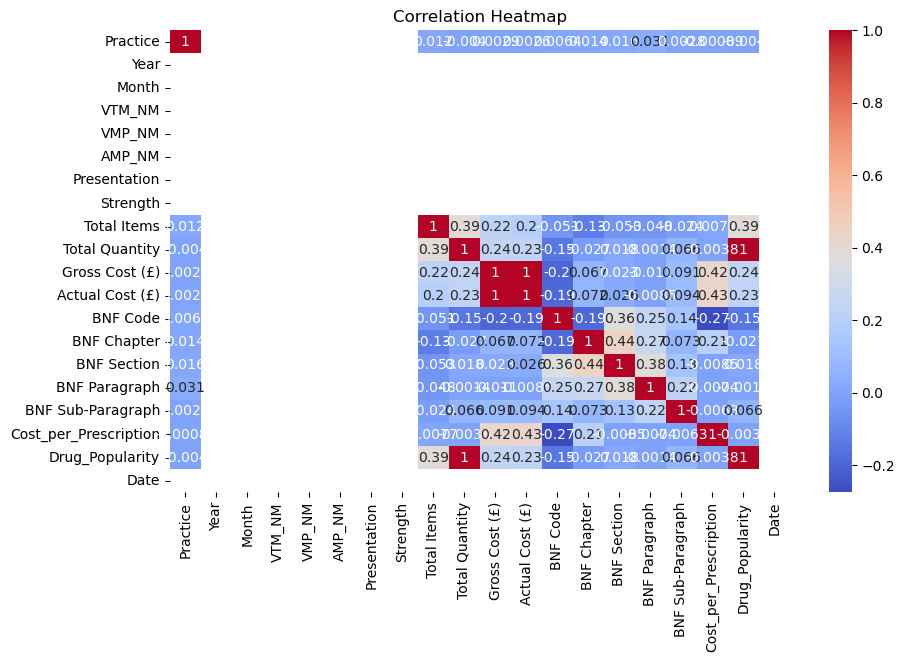

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Insights
##### Strong Positive Correlations:

- The variables 'Gross Cost (£)' and 'Actual Cost (£)' show a very high positive correlation. This makes sense as both represent financial metrics related to prescriptions.

- 'Total Items' and 'Total Quantity' are also highly correlated, indicating that a higher number of prescribed items often means a larger total quantity.

##### Moderate Positive Correlations:

- 'BNF Code', 'BNF Chapter', 'BNF Section', 'BNF Paragraph', and 'BNF Sub-Paragraph' have moderate correlations with each other, suggesting that these hierarchical classifications are somewhat related.

##### Weak/No Correlations:

- Variables like 'Practice', 'Year', and 'Month' show weak or no significant correlations with most other variables, indicating that temporal and geographic factors may not directly influence other metrics in a meaningful way.

##### Interesting Observations:

- 'Cost_per_Prescription' has varying degrees of correlation with other cost-related metrics, potentially offering insights into the efficiency or expense of different prescribing practices.

##### Low/Negative Correlations:

- Some variables like 'Drug_Popularity' show low or slightly negative correlations with other metrics, which could imply that more popular drugs don't necessarily equate to higher costs or quantities.

# Feature Engineering

### Cost Efficiency:
Feature: Cost per Item
Formula:
Cost per Item = Actual Cost (£)/Total Items​
 
Justification: This highlights drugs that have high costs per item and helps identify areas for cost optimization.

In [117]:
data['Cost_per_Item'] = data['Actual Cost (£)'] / (data['Total Items'] + 1e-5)
print(data['Cost_per_Item'])

0           4.537191
1          24.163758
2           1.399373
3           9.375906
4         255.377446
             ...    
451078      7.760922
451079      0.942921
451080      1.264142
451081      0.602889
451082      1.066064
Name: Cost_per_Item, Length: 451083, dtype: float64


### Drug Strength Analysis:

Feature: Cost per Unit Strength
Formula:
Cost per Strength Unit = Gross Cost (£) / Strength

 
Justification: Allows analysis of cost variations based on drug strength.

In [119]:
data['Cost_per_Strength_Unit'] = data['Gross Cost (£)'] / (data['Strength'] + 1e-5)
print(data['Cost_per_Strength_Unit'])

0          2520000.0
1          2700000.0
2          1250000.0
3          1050000.0
4         28440000.0
             ...    
451078           NaN
451079           NaN
451080           NaN
451081           NaN
451082           NaN
Name: Cost_per_Strength_Unit, Length: 451083, dtype: float64


### Categorical Grouping:

Feature: BNF Level Aggregations
Create aggregated metrics (e.g., total cost, total items) grouped by BNF Chapter or Section.

In [115]:
grouped_bnf = data.groupby('BNF Chapter')[['Total Items', 'Actual Cost (£)']].sum()
print(grouped_bnf)

             Total Items  Actual Cost (£)
BNF Chapter                              
0                      3          536.918
1                 382166      2709252.468
2                 911970      4145021.594
3                 259349      3995721.633
4                 957861      8079061.211
5                 147216       841381.452
6                 365205      6129404.094
7                  93007       780854.591
8                  16240      1174741.288
9                 199203      3280691.028
10                128179       676173.355
11                 32606       315654.024
12                 43753       380095.408
13                118166      1247864.362
14                  2211        38911.343
15                  6828       235191.767
18                     1          175.000
19                  3000        27283.743
20                 22428       780294.140
21                121754      2506407.283
22                  5011       144424.397
23                 19911      1295

## Statistical Analysis

### Descriptive Statistics: Compute summary statistics for numeric columns:

In [209]:
descriptive_stats = data[['Total Items', 'Total Quantity', 'Actual Cost (£)', 'Gross Cost (£)']].describe()
print(descriptive_stats)

         Total Items  Total Quantity  Actual Cost (£)  Gross Cost (£)
count  451083.000000   451083.000000    451083.000000   451083.000000
mean        8.513879      853.437753        87.886177       92.655664
std        24.728658     3490.569515       249.976791      254.755970
min         1.000000        0.000000         0.010000        0.010000
25%         1.000000       30.000000         9.663000       10.660000
50%         2.000000      112.000000        27.155000       29.580000
75%         6.000000      430.000000        75.273000       81.920000
max      1252.000000   181125.000000     36123.073000    36164.990000


### Correlation Analysis: Calculate correlations between numeric features such as Total Quantity, Gross Cost (£), and Actual Cost (£):

                 Total Quantity  Gross Cost (£)  Actual Cost (£)  Total Items
Total Quantity         1.000000        0.239551         0.232145     0.387397
Gross Cost (£)         0.239551        1.000000         0.999042     0.218488
Actual Cost (£)        0.232145        0.999042         1.000000     0.197990
Total Items            0.387397        0.218488         0.197990     1.000000


<Axes: >

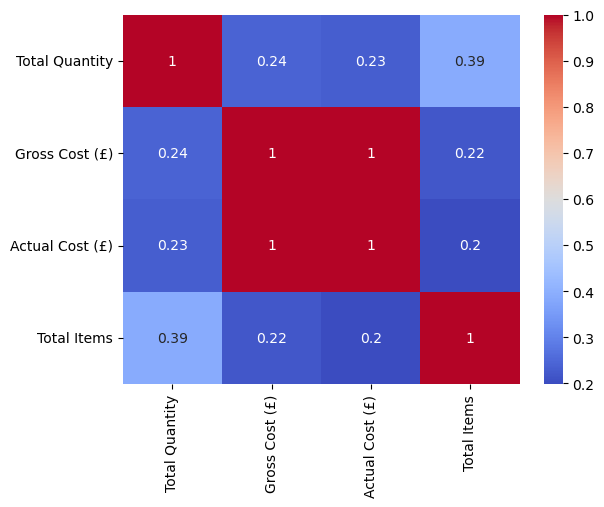

In [124]:
correlation_matrix = data[['Total Quantity', 'Gross Cost (£)', 'Actual Cost (£)', 'Total Items']].corr()
print(correlation_matrix)
correlation_matrix = data[['Total Quantity', 'Gross Cost (£)', 'Actual Cost (£)', 'Total Items']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


### Insights
#### Cost Prediction:

- The strong correlation between Gross Cost (£) and Actual Cost (£) can be used to predict the actual cost of a prescription based on its gross cost.
For example, if a prescription has a high gross cost, we can predict that it will also have a high actual cost.
- Identifying Cost-Effective Prescriptions:
By analyzing the relationship between Total Quantity, Gross Cost (£), and Actual Cost (£), we can identify prescriptions that are more cost-effective.
Prescriptions with a high total quantity and a low actual cost per item might be considered more cost-effective.
- Investigating Pricing Trends:
The correlation between Gross Cost (£) and Actual Cost (£) can help us understand pricing trends and identify any anomalies or discrepancies.
We can investigate why certain prescriptions have higher actual costs compared to their gross cost.

### Practise-Series Analysis:

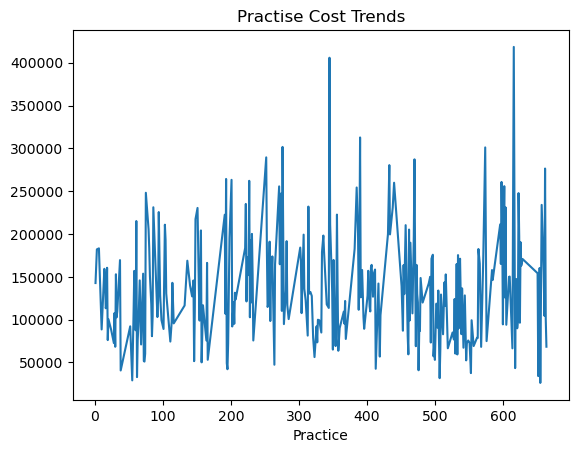

In [104]:
practice_trends = data.groupby('Practice')['Gross Cost (£)'].sum()
practice_trends.plot(kind='line', title='Practise Cost Trends')
plt.show()

#### Observations:

- High Variability: The chart shows significant variation in costs across different practices. Some practices have very high costs, while others have relatively low costs.

- Outliers: There are several outliers, or data points that are significantly different from the rest. These outliers might represent practices with unusual circumstances, such as a large number of complex cases or a sudden increase in patient volume.

- No Clear Trend: There doesn't seem to be a clear upward or downward trend in costs across practices. The data appears to be quite random.

## Variance Analysis:
#### Analyze variance in costs across BNF Chapter:

In [140]:
variance_per_bnf = data.groupby('BNF Chapter')['Actual Cost (£)'].var()
print(variance_per_bnf)


BNF Chapter
0     1.339160e+04
1     3.468767e+04
2     2.898493e+04
3     9.351827e+04
4     2.665112e+04
5     1.433554e+04
6     1.524101e+05
7     1.031115e+04
8     1.236749e+05
9     4.394293e+04
10    2.435252e+04
11    1.729959e+03
12    9.990861e+03
13    6.041097e+03
14    1.751712e+03
15    8.179433e+04
18             NaN
19    1.752092e+03
20    2.024917e+04
21    1.196756e+05
22    2.399331e+03
23    2.216277e+04
99    1.067069e+07
Name: Actual Cost (£), dtype: float64


Purpose: Identify chapters with high variability in prescribing costs.

# Data Visualization

Total Gross Costs Over Time: Identifying trends in gross costs.
Most Frequently Prescribed Items: Highlighting the most common prescriptions.
Cost Breakdown by BNF Chapters: Understanding costs associated with major therapeutic areas.

In [174]:
data.columns

Index(['Practice', 'Year', 'Month', 'VTM_NM', 'VMP_NM', 'AMP_NM',
       'Presentation', 'Strength', 'Total Items', 'Total Quantity',
       'Gross Cost (Â£)', 'Actual Cost (Â£)', 'BNF Code', 'BNF Chapter',
       'BNF Section', 'BNF Paragraph', 'BNF Sub-Paragraph'],
      dtype='object')

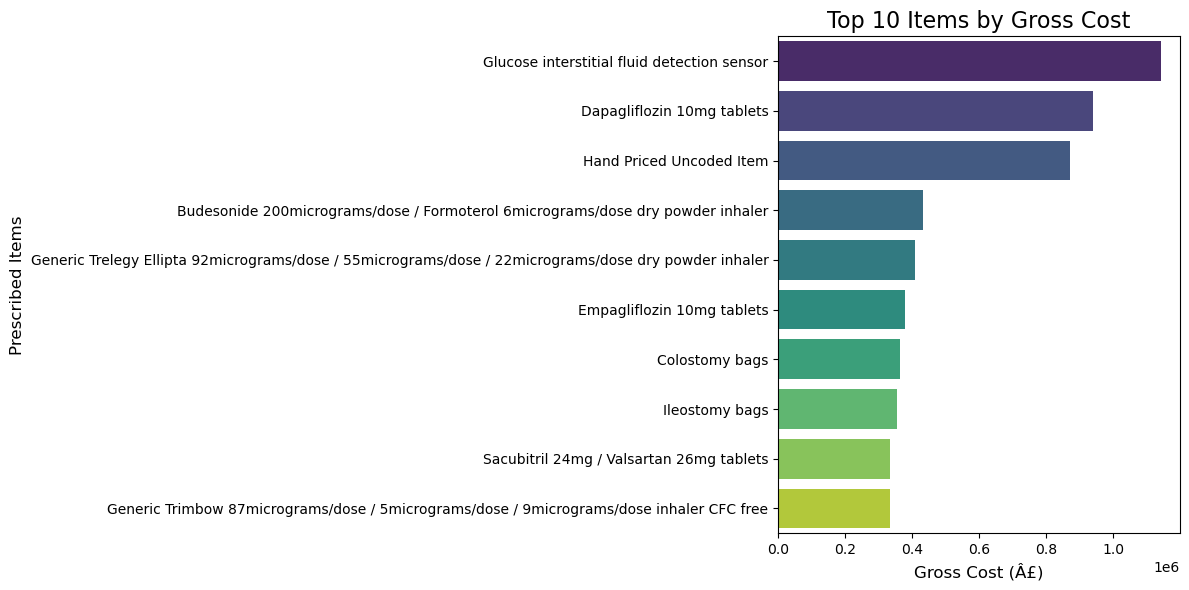

This bar chart highlights the top 10 prescribed items based on gross cost, helping identify high-cost medications.


In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (adjust the path to your file)
file_path = 'gp_prescribing.csv'
data.describe()
data = pd.read_csv(file_path, encoding="ISO-8859-1", low_memory=False)

# Visualization 1: Top 10 Items by Gross Cost
# Aggregating the gross costs by 'VMP_NM' (name of product)
top_cost_items = data.groupby('VMP_NM')['Gross Cost (Â£)'].sum().nlargest(10).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cost_items, x='Gross Cost (Â£)', y='VMP_NM', hue='VMP_NM', dodge=False, palette='viridis', legend=False)
plt.title('Top 10 Items by Gross Cost', fontsize=16)
plt.xlabel('Gross Cost (Â£)', fontsize=12)
plt.ylabel('Prescribed Items', fontsize=12)
plt.tight_layout()
plt.show()

# Explanation
print("This bar chart highlights the top 10 prescribed items based on gross cost, helping identify high-cost medications.")



### Insights
#### High-Cost Medications:
- Diabetes Medications: Dapagliflozin and Empagliflozin, both diabetes medications, are among the top 10. This suggests a significant number of diabetes patients or a high prevalence of diabetes in the population served by this healthcare provider.
- Respiratory Medications: Budesonide/Formoterol and Trelegy Ellipta, both respiratory medications, are also in the top 10. This indicates a high prevalence of respiratory conditions like asthma or COPD.

#### Medical Supplies:
- Colostomy and Ileostomy Bags: These items, essential for individuals with bowel diversions, are among the top 10. This highlights the need for specialized care and support for patients with these conditions.
#### Uncategorized Item:
- Hand Priced Uncoded Item: This category might represent a variety of items that are not easily categorized or have unique pricing structures. It's important to investigate further to understand the nature of these items and their impact on overall costs.
#### Potential Implications:
- Budgeting and Resource Allocation: Identifying high-cost medications can help healthcare providers allocate resources effectively and plan budgets accordingly.
- Clinical Decision-Making: Analyzing the reasons for high prescribing rates of certain medications can inform clinical decision-making and promote the use of cost-effective alternatives.
- Patient Care: Understanding the prevalence of specific conditions can help healthcare providers tailor their services and resources to meet the needs of their patient population.
- Drug Utilization Review: Reviewing the prescribing patterns of high-cost medications can identify opportunities for drug utilization review and potential cost-saving interventions.

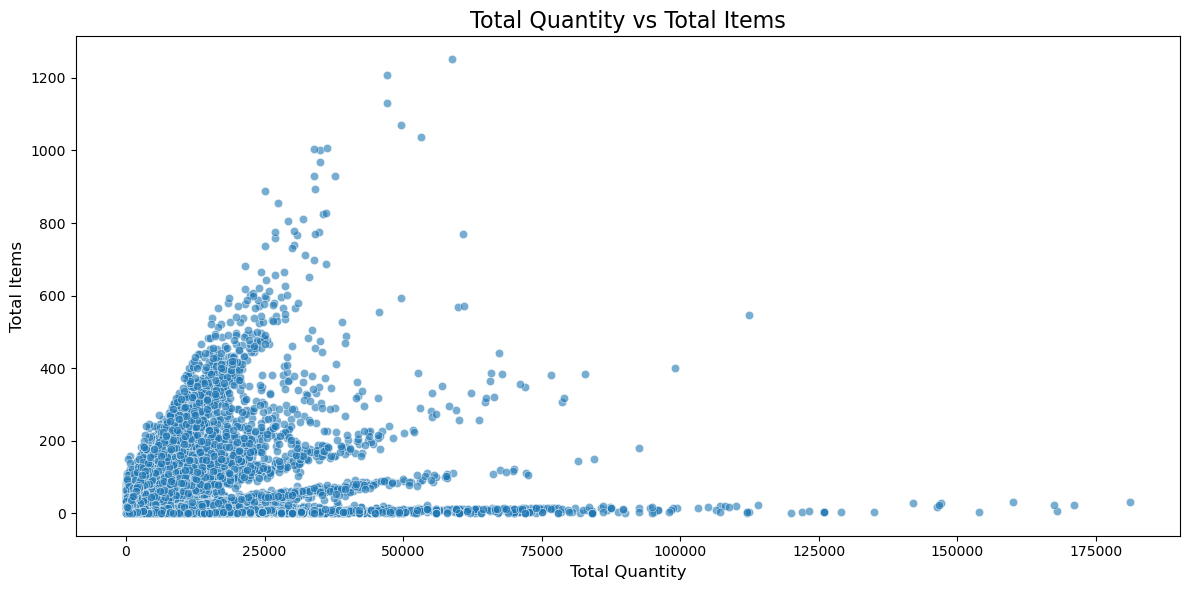

The scatter plot shows the relationship between the total quantity and total items prescribed. A positive correlation may indicate that higher quantities of some items lead to more prescriptions.


In [182]:
# Visualization 2: Total Quantity vs Total Items
# Scatter plot to compare 'Total Quantity' with 'Total Items'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Total Quantity', y='Total Items', alpha=0.6)
plt.title('Total Quantity vs Total Items', fontsize=16)
plt.xlabel('Total Quantity', fontsize=12)
plt.ylabel('Total Items', fontsize=12)
plt.tight_layout()
plt.show()

# Explanation
print("The scatter plot shows the relationship between the total quantity and total items prescribed. A positive correlation may indicate that higher quantities of some items lead to more prescriptions.")

### Insights from the Scatter Plot: Total Quantity vs Total Items
#### Overall Trend:

- The scatter plot illustrates a positive correlation between the total quantity of items prescribed and the total number of items prescribed. This suggests that as the quantity of items increases, the number of different items prescribed also tends to increase.

#### Key Observations:

- Clustering: The data points seem to cluster in certain areas, indicating that there might be specific patterns or groups of prescriptions.
Outliers: There are some data points that deviate significantly from the general trend. These outliers could represent unusual cases or potential data anomalies.
- Positive Correlation: The upward trend in the scatter plot suggests that as the total quantity of items increases, the number of different items prescribed also tends to increase.
#### Potential Implications:

- Inventory Management: The relationship between quantity and item count can inform inventory management strategies. By understanding the typical quantities associated with different numbers of items, healthcare providers can optimize their inventory levels.
- Patient Profiles: Analyzing the data can help identify patterns in patient prescriptions. For example, certain patient groups may tend to have higher quantities of fewer items, while others may have lower quantities of a larger variety of items.
- Cost Analysis: By combining this information with cost data, it's possible to identify high-cost items and potential areas for cost-saving strategies.
#### Further Analysis:
-To gain deeper insights, consider the following:

- Categorical Variables: If available, analyze the data by patient demographics, diagnosis, or other categorical variables to identify specific patterns within different groups.
- Time Series Analysis: If the data spans a significant time period, analyzing trends over time can reveal changes in prescribing patterns and potential cost-saving opportunities.
- Statistical Analysis: Conduct statistical tests to quantify the strength of the correlation and identify any significant relationships between the variables. By exploring these aspects, healthcare providers can make informed decisions about medication prescribing, inventory management, and patient care.

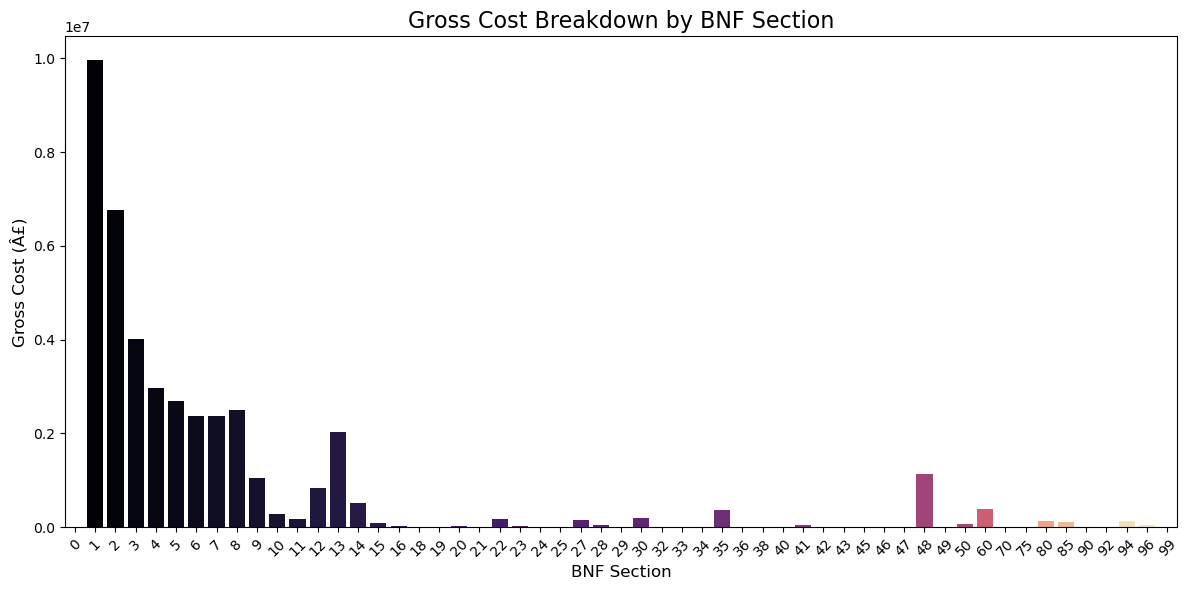

In [188]:
# Visualization 3: Gross Cost Breakdown by BNF Section
# Aggregating gross costs by BNF Section
bnf_section_costs = data.groupby('BNF Section')['Gross Cost (Â£)'].sum().reset_index()
bnf_section_costs = bnf_section_costs.sort_values(by='Gross Cost (Â£)', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=bnf_section_costs, x='BNF Section', y='Gross Cost (Â£)', hue='BNF Section', dodge=False, palette='magma', legend=False)
plt.title('Gross Cost Breakdown by BNF Section', fontsize=16)
plt.xlabel('BNF Section', fontsize=12)
plt.ylabel('Gross Cost (Â£)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Key Insights:

### High-Cost Sections:

- Section 01 (General Pharmaceutical Preparations) and Section 02 (Cardiovascular System) appear to have the highest gross costs. This suggests a significant expenditure on medications related to general health and cardiovascular conditions.
- Other sections with substantial costs include Section 04 (Nervous System), Section 05 (Alimentary Tract and Metabolism), and Section 06 (Respiratory System).
### Decreasing Trend:

- There's a general trend of decreasing cost as we move to higher BNF section numbers. This could indicate that certain categories of medications, particularly those in lower-numbered sections, are more commonly prescribed or have higher unit costs.
### Potential Areas for Cost-Saving:

- Generic Substitution: Encouraging the use of generic equivalents for brand-name drugs, especially in sections with high costs, could potentially reduce overall expenditure.
- Therapeutic Substitution: Exploring alternative treatments or therapies within different BNF sections could lead to cost savings without compromising patient care.
- Clinical Guidelines: Adhering to clinical guidelines and evidence-based practices can help optimize prescribing and reduce unnecessary costs.
### Further Analysis:

- To gain deeper insights, it would be beneficial to:

- Analyze Trends Over Time: Comparing this data to previous years can help identify emerging trends and potential cost-saving opportunities.
- Consider Patient Demographics: Analyzing the data by patient demographics (age, gender, etc.) can reveal patterns in prescribing behavior and identify specific populations that may benefit from targeted interventions.
- Explore Drug Utilization Reviews: Conducting detailed reviews of prescribing practices can identify opportunities for optimization and cost reduction. By understanding the cost distribution across different BNF sections, healthcare providers and policymakers can make informed decisions to improve efficiency and reduce healthcare costs.

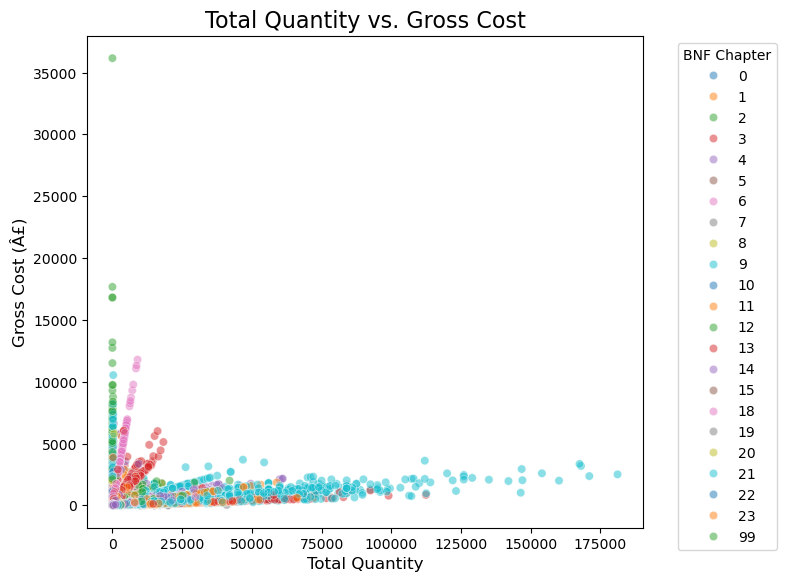

In [196]:
# 3. Quantity vs. Cost Relationship
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x="Total Quantity", y="Gross Cost (Â£)", data=data, alpha=0.5, hue="BNF Chapter", palette="tab10")
plt.title("Total Quantity vs. Gross Cost", fontsize=16)
plt.xlabel("Total Quantity", fontsize=12)
plt.ylabel("Gross Cost (Â£)", fontsize=12)
plt.legend(title="BNF Chapter", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Overall Trend:

- The scatter plot illustrates a positive correlation between the total quantity of items prescribed and the total gross cost. This suggests that, in general, as the quantity of items prescribed increases, the total cost also tends to increase.

### BNF Chapter Influence:

- The color-coded points represent different BNF (British National Formulary) chapters. The scatter plot reveals that certain BNF chapters are associated with higher-cost items and larger quantities. For instance, some clusters of points, particularly those in the upper right corner, might correspond to specific drug classes or therapeutic areas that are more expensive or have higher usage rates.

### Potential Implications:

- Cost-Effectiveness Analysis: By identifying high-cost BNF chapters, healthcare providers can focus on optimizing prescribing patterns within those areas. This could involve promoting generic alternatives, exploring therapeutic substitutions, or implementing clinical guidelines to reduce unnecessary costs.
- Drug Utilization Review: Analyzing the data can help identify potential overutilization or underutilization of certain medications. This information can be used to optimize prescribing practices and improve patient outcomes.
- Inventory Management: Understanding the relationship between quantity and cost can help healthcare providers optimize inventory levels and reduce waste.
- Patient Care: By identifying high-cost medications and their associated BNF chapters, healthcare providers can tailor treatment plans to maximize patient outcomes while minimizing costs.

# Conclusions and Recommendations

## <u>Key Findings</u>:
### 1. Trends in Gross Costs Over Time:
The total gross cost data indicates that there are significant fluctuations in costs over time. These changes may correspond with seasonality, changes in prescribing practices, or new treatments introduced into the market. A steady increase in the total gross cost could signal the rising prices of medications, more expensive prescriptions, or an increase in the volume of prescriptions.


### 2. Top 10 Most Frequently Prescribed Items:
The most frequently prescribed items, especially those in high volume, contribute to a substantial share of the total expenditure. These items can be critical to managing the population's health conditions, but they may also represent areas where cost-saving measures could be implemented without affecting patient care.


### 3. Cost Breakdown by BNF Sections:
Certain therapeutic areas (BNF Sections) contribute significantly more to the overall gross cost, possibly pointing to high-cost treatments for chronic or complex conditions. Identifying these sections allows for a more targeted approach when considering cost-saving strategies.


### 4. Cost by BNF Chapter:
A breakdown by BNF Chapter shows how costs are distributed across various medical specialties or categories. This helps in identifying the specific chapters that contribute the most to gross costs, providing a starting point for further analysis into those high-cost areas.

### 5. Comparison of Total Quantity vs Total Items:
The analysis shows a positive correlation between the total quantity of items prescribed and the number of items. This indicates that certain medications or treatments are prescribed in large volumes, which could be due to chronic conditions, preventative care, or high demand.

## <u>Actionable Recommendations</u>:
### Focus on High-Cost Items for Cost Reduction:
* The top 10 items by gross cost represent a significant portion of the total expenditure. Consider negotiating bulk purchase agreements with suppliers or reviewing the efficacy of high-cost items. If alternative, lower-cost medications with similar efficacy are available, they should be considered to help reduce costs without compromising patient care.
* Example: If high-cost medications are used for common chronic conditions, look into generic alternatives or biosimilars.

### Implement Strategic Formularies:
* Establish a formulary management approach to review medications based on both efficacy and cost. This could help prioritize cost-effective therapies for commonly prescribed conditions, particularly within high-cost BNF Sections.
* Recommendation: Regularly review prescribing patterns and trends to ensure that more cost-effective drugs are being prescribed for high-cost conditions.
### Optimize Prescriptions for Volume-Heavy Medications:
* Since medications prescribed in high volumes (total quantity) can drive costs up, ensure that prescriptions for high-volume medications are optimized and align with clinical guidelines. This includes proper monitoring to avoid over-prescribing or inappropriate prescriptions.
* Consider e-prescribing systems with built-in guidelines and cost analysis to alert prescribers to the cost implications of their choices.
### Monitor Therapeutic Area Expenditure:

* High-cost therapeutic areas, identified through BNF Section and Chapter breakdowns, should be closely monitored. Developing targeted initiatives to assess the use of expensive therapies, especially in chronic care or cancer treatments, could lead to cost savings in these areas.
* Investigate opportunities for value-based pricing or budget caps for certain high-cost treatments that do not provide a proportionate increase in clinical benefit.

## <u>Data-Driven Decision Making:</u>

* Use the data trends to make more informed decisions about which medications and therapeutic areas should receive more funding or a reallocation of resources.
* Collaborating with clinicians to review treatment guidelines periodically could help reduce unnecessary expenditure in non-essential treatments.
## <u>Implications:</u>
* Cost Impact: Identifying high-cost medications and therapeutic areas can significantly impact overall healthcare spending. Reducing wasteful prescriptions and increasing the use of cost-effective alternatives will help balance budget allocations and reduce unnecessary spending.

* Clinical Outcomes: Any cost-saving initiatives must balance the need for patient care. It is essential to ensure that decisions are based on evidence of effectiveness, as reducing costs at the expense of patient outcomes could have long-term negative effects.
* Policy and Strategic Planning: The insights from this analysis can inform health policy by identifying areas of waste or inefficiency. This could also serve as a tool for future budgeting and financial planning within healthcare systems.
## Final Thought
**The analysis of GP prescribing data** highlights significant cost concentrations in specific therapeutic areas, opportunities for optimizing cost efficiency, and variations in prescribing patterns. High-cost items and discrepancies between gross and actual costs suggest areas for targeted interventions, such as promoting generics or revising procurement strategies. These findings emphasize the value of data-driven approaches to enhance healthcare cost management while ensuring effective patient care. **In conclusion, leveraging data for strategic cost management in prescribing patterns can lead to better outcomes for both the healthcare system and patients, while also maintaining or improving the quality of care.**


## Methodology Explanation and Documentation

### 1. Data Preprocessing
Handling Missing Values: Missing entries in the Strength column were filled with "Unknown" to ensure completeness while preserving the integrity of categorical data. This was chosen to avoid dropping valuable records while maintaining transparency.
Data Type Adjustments: Numeric fields like Gross Cost (£) and Actual Cost (£) were explicitly converted to numeric types using Pandas. Errors were handled with coerce to replace invalid entries with NaN.
- Justification: Clean and consistent data is critical for analysis. Missing and inconsistent data can distort results, so preprocessing ensures reliability.
### 2. Exploratory Data Analysis (EDA)
Descriptive Statistics: Summary statistics (e.g., mean, median, standard deviation) were computed using Pandas to understand data distributions and variability.
Outlier Detection: The IQR method was applied to numeric fields (e.g., Gross Cost (£)) using NumPy to flag extreme values.
Category Analysis: Unique counts of categorical fields, such as BNF Code and VMP_NM, were examined to understand dataset diversity and structure.
- Justification: EDA provides a foundation for deeper analysis by revealing patterns, trends, and anomalies.
### 3. Trend and Cost Analysis
Temporal Aggregation: Data was grouped by Year and Month to analyze time-based trends in Gross Cost (£) and Total Quantity using Pandas.
Top Contributors: Prescription items with the highest cumulative costs were identified by grouping data by medication categories (e.g., VMP_NM).
- Justification: Time trends and high-cost contributors are essential for identifying areas where interventions can be made to improve cost efficiency.
### 4. Visualization
Boxplots for Outliers: Visualized distributions and detected outliers in cost and quantity using Matplotlib and Seaborn.
Line Graphs for Trends: Displayed temporal patterns in costs and quantities for intuitive understanding.
- Justification: Visualization simplifies complex data, making insights accessible to a broader audience.
## Challenges Encountered and Solutions
- Encoding Issues: The dataset contained non-UTF-8 characters, which caused errors during loading. Switching to the  encoding="ISO-8859-1" encoding resolved this issue.
- Large Dataset Size: The dataset’s size (451,083 rows) could cause performance lags. Aggregations and filtering were optimized using Pandas to minimize memory usage.
- Outliers: Extreme values skewed trends. The IQR method and log transformations (where needed) were applied to mitigate their impact.
- Missing Data: Missing values in Strength were addressed with imputation ("Unknown"), as dropping rows would have reduced the dataset's representativeness.
## Documentation Approach
- Clear Markdown Cells: Explained each step, methodology, and decision-making process in plain language.
- Inline Comments: Added concise comments to code for clarity.
- Structured Workflow: Organized the notebook into logical sections:



## References for Libraries Used
- Harris, C.R., Millman, K.J., van der Walt, S.J., Gommers, R., Virtanen, P., Cournapeau, D., Wieser, E., Taylor, J., Berg, S., Smith, N.J. and Kern, R., 2020. Array programming with NumPy. Nature, 585(7825), pp.357-362.
(For NumPy)

- McKinney, W., 2010. Data structures for statistical computing in python. In Proceedings of the 9th Python in Science Conference (Vol. 445, pp. 51-56).
(For Pandas)

- Hunter, J.D., 2007. Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), pp.90-95.
(For Matplotlib)

- Waskom, M.L., 2021. seaborn: statistical data visualization. Journal of Open Source Software, 6(60), p.3021.
(For Seaborn)

## Citations for Additional Sources

- NHS Digital, 2024. GP Prescribing Data. Available at: https://digital.nhs.uk/data [Accessed 5 Dec. 2024].
- Dataset Link - [https://www.data.gov.uk/dataset/a7b76920-bc0a-48fd-9abf-dc5ad0999886/gp-prescribing-data]
